In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\ML\\DSBDA\\Practical\\Pro_13\\heart.csv")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# Cell 1: Imports

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [7]:
# Cell 3: Data Cleaning (Remove NA, ?, Negative Values)

In [8]:
# a. Data Cleaning (Remove NA, ?, Negative values etc.)

print("\nBefore Cleaning:")
print(df.isnull().sum())

# Replace '?' with NaN if present
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values (none in this case)
df.dropna(inplace=True)

# Remove negative values from numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df = df[df[col] >= 0]

print("\nAfter Cleaning:")
print(df.isnull().sum())



Before Cleaning:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

After Cleaning:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [9]:
# Cell 4: Outlier Detection and Removal 

In [10]:
# b. Error Correcting (Outlier Detection and Removal)

# Define IQR function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from selected important columns
for col in ['trtbps', 'chol', 'thalachh', 'oldpeak']:
    df = remove_outliers(df, col)

print("\nShape after Outlier Removal:", df.shape)



Shape after Outlier Removal: (284, 14)


In [11]:
# Cell 5: Data Transformation (Feature Scaling)

In [12]:
# c. Data Transformation (Normalizing Features)

features = df.drop('output', axis=1)
labels = df['output']

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("\nData Transformation Completed.")



Data Transformation Completed.


In [13]:
# Cell 6: Build and Train Model

In [14]:
# d. Build Data Models (Logistic Regression and KNN) and Compare Accuracy

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("\nAccuracy of Logistic Regression Model: {:.2f}%".format(lr_accuracy * 100))
print("Accuracy of KNN Model: {:.2f}%".format(knn_accuracy * 100))



Accuracy of Logistic Regression Model: 85.96%
Accuracy of KNN Model: 78.95%


In [16]:
# Cell 7: Model Comparison


Logistic Regression performed better.


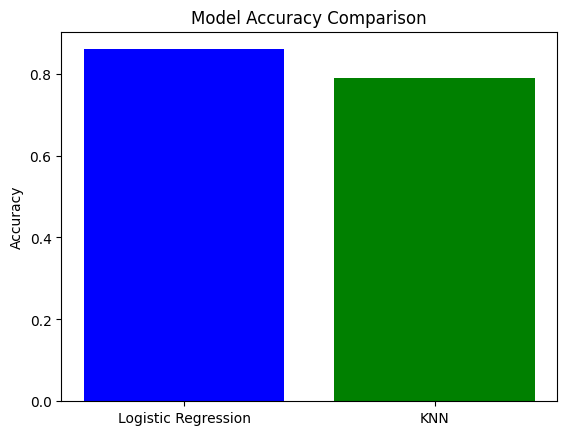

In [17]:
# Comparison
if lr_accuracy > knn_accuracy:
    print("\nLogistic Regression performed better.")
else:
    print("\nKNN performed better.")

# Bar Plot of Accuracies
models = ['Logistic Regression', 'KNN']
accuracies = [lr_accuracy, knn_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
